<p style="background-color:#373435;color:#fff;font-family:newtimeroman;font-size:250%;text-align:center;border-radius:10px 10px; padding:10px;">BigBasket Product Recommendor</p>
<p style="background-color:#ed3237;color:#fff;font-family:newtimeroman;font-size:180%;text-align:center;border-radius:10px 10px; padding:10px;">A Beginner Friendly Guide to Creating Recommendation Systems</p>

<div style="text-align:center;">
<img src="https://m.media-amazon.com/images/S/aplus-media/sota/46b115bd-5ab5-4a74-b6b6-bb7cb4973d80.__CR0,0,600,180_PT0_SX600_V1___.png">
</div>

---
<a id='section-0'></a>
<p style="background-color:#373435;color:#fff;font-family:newtimeroman;font-size:120%;text-align:center;border-radius:10px 10px; padding:10px;">Table Of Contents</p>
<ol>
    <li><a href="#section-1" style="color:#5a90a7; font-size:120%;">Introduction</a></li>
    <li><a href="#section-2" style="color:#5a90a7;font-size:120%;">Importing Necessary Libraries</a></li>
    <li><a href="#section-3" style="color:#5a90a7;font-size:120%;">Data Loading and Cleaning</a></li>
    <li><a href="#section-4" style="color:#5a90a7;font-size:120%;">Exploratory Data Analysis</a></li>
    <li><a href="#section-5" style="color:#5a90a7;font-size:120%;">Demographic Filter Recommendor</a></li>
    <li><a href="#section-6" style="color:#5a90a7;font-size:120%;">Content Based Recommendor</a></li>
    <li><a href="#section-99" style="color:#5a90a7;font-size:120%;">Thank You</a></li>
</ol>

---

<a id='section-1'></a>
<p style="background-color:#373435;color:#fff;font-family:newtimeroman;font-size:200%;text-align:center;border-radius:10px 10px; padding:10px;">Introduction</p>

<p style="text-align:center;">
<a href="#section-0" style="background-color:#373333;color:#f1f1f1;font-family:newtimeroman;text-align:center;border-radius:10px 10px; padding:10px;">Back To Top</a>
</p>

<p style="color:#373435; font-size:16px;font-weight:400;">Have you ever noticed how when you seach for a product on Amazon, similar products are shown below it. An example of this is when you search for self-help books, Amazon shows other self-help books that might interest you. This is the job of a recommendation system.
<br><br>
Recommendation Systems are a type of information filtering systems as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user. Recommendation system finds similarity between the product a user clicks on and the other products and then recommends if their is some sustainable similarity.
<br><br>
Youtube recommends videos and even decides which video to play next on autoplay. Facebook and Instagram recommend friends and pages to folow. Instagram also recommends reels that you might be interested in. Netflix recommends movies based on user taste and genre selection, it even recommends thumbnails of movies based on user data. Amazon, BigBasket and other E-Commerce websites recommend ads and products based on the items we buy or search for.
<br><br>
In this notebook, we will be building a product recommendor with detailed explanations.
<br><br>
    <b>So Let's Start!!!</b>

There are basically three types of recommender systems:-
<ol style="color:#373435; font-size:16px;font-weight:400;">
    <li style="color:#373435; font-size:16px;font-weight:400;"><b>Demographic Filtering-</b> They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.
    </li>
    <br>
<li style="color:#373435; font-size:16px;font-weight:400;"><b>Content Based Filtering-</b> They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.
    </li>
    <br>
<li style="color:#373435; font-size:16px;font-weight:400;"><b>Collaborative Filtering-</b> This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.
    </li>
</ol>
</p>
<p style="color:#373435; font-size:16px;font-weight:400;">
Here is the deployment link of the recommendation system: <a href="https://vermaayush680-bigbasket-product-recommendation-s-mainapp-bp8r67.streamlitapp.com/" target="_blank" style="color:blue; font-size:18px;font-weight:500;">Deployment Link</a>
Will be creating a separate deployment notebook to teach it.
</p>

<a id='section-2'></a>
<p style="background-color:#373435;color:#fff;font-family:newtimeroman;font-size:200%;text-align:center;border-radius:10px 10px; padding:10px;">Importing Libraries</p>

<p style="text-align:center;">
<a href="#section-0" style="background-color:#373333;color:#f1f1f1;font-family:newtimeroman;text-align:center;border-radius:10px 10px; padding:10px;">Back To Top</a>
</p>

In [1]:
#Basic Libraries
import numpy as np
import pandas as pd

# #Visualization Libraries
import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px
import textwrap

# #Text Handling Libraries
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity 

<a id='section-3'></a>
<p style="background-color:#373435;color:#fff;font-family:newtimeroman;font-size:200%;text-align:center;border-radius:10px 10px; padding:10px;">Data Loading and Cleaning</p>

<p style="text-align:center;">
<a href="#section-0" style="background-color:#373333;color:#f1f1f1;font-family:newtimeroman;text-align:center;border-radius:10px 10px; padding:10px;">Back To Top</a>
</p>

In [2]:
df=pd.read_csv('BigBasket Products.csv', index_col='index')
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [3]:
df.shape

(27555, 9)

In [4]:
df.isnull().sum()

product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27555 entries, 1 to 27555
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product       27554 non-null  object 
 1   category      27555 non-null  object 
 2   sub_category  27555 non-null  object 
 3   brand         27554 non-null  object 
 4   sale_price    27555 non-null  float64
 5   market_price  27555 non-null  float64
 6   type          27555 non-null  object 
 7   rating        18929 non-null  float64
 8   description   27440 non-null  object 
dtypes: float64(3), object(6)
memory usage: 2.1+ MB


In [6]:
# print('Percentage Null Data In Each Column')
# print('-'*30)
# for col in df.columns:
#     null_count = df[col].isnull().sum()
#     total_count = df.shape[0]
#     print("{} : {:.2f}".format(col,null_count/total_count * 100))
    

In [7]:
# print('Total Null Data')
# null_count = df.isnull().sum().sum()
# total_count = np.product(df.shape)
# print("{:.2f}".format(null_count/total_count * 100))

<!-- <p style="color:#373435; font-size:16px;font-weight:400;">So overall 3% data is missing but 31% of ratings are missing.
Since we are going to create a recommender system, let's drop the null values as their will still be over 69% data for recommendation purposes which is enough for us.</p> -->

In [8]:
# Calculate the mode of the column
mode_value = df['rating'].mode()[0]

# Fill missing values with the mode value using fillna()
df['rating'].fillna(mode_value, inplace=True)

In [9]:
df['description'].fillna('Not Given', inplace=True)
df['product'].fillna('Not available', inplace=True)
df['brand'].fillna('Not available', inplace=True)

In [10]:
df.isnull().sum()

product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
dtype: int64

In [11]:
# df.to_csv('data_cleaned.csv')

<a id='section-4'></a>
<p style="background-color:#373435;color:#fff;font-family:newtimeroman;font-size:200%;text-align:center;border-radius:10px 10px; padding:10px;">Exploratory Data Analysis</p>

<p style="text-align:center;">
<a href="#section-0" style="background-color:#373333;color:#f1f1f1;font-family:newtimeroman;text-align:center;border-radius:10px 10px; padding:10px;">Back To Top</a>
</p>

In [12]:
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [13]:
counts = df['category'].value_counts()

df_counts = pd.DataFrame(counts)
df_counts.columns = ['Counts']
df_counts.index.name = 'Category'

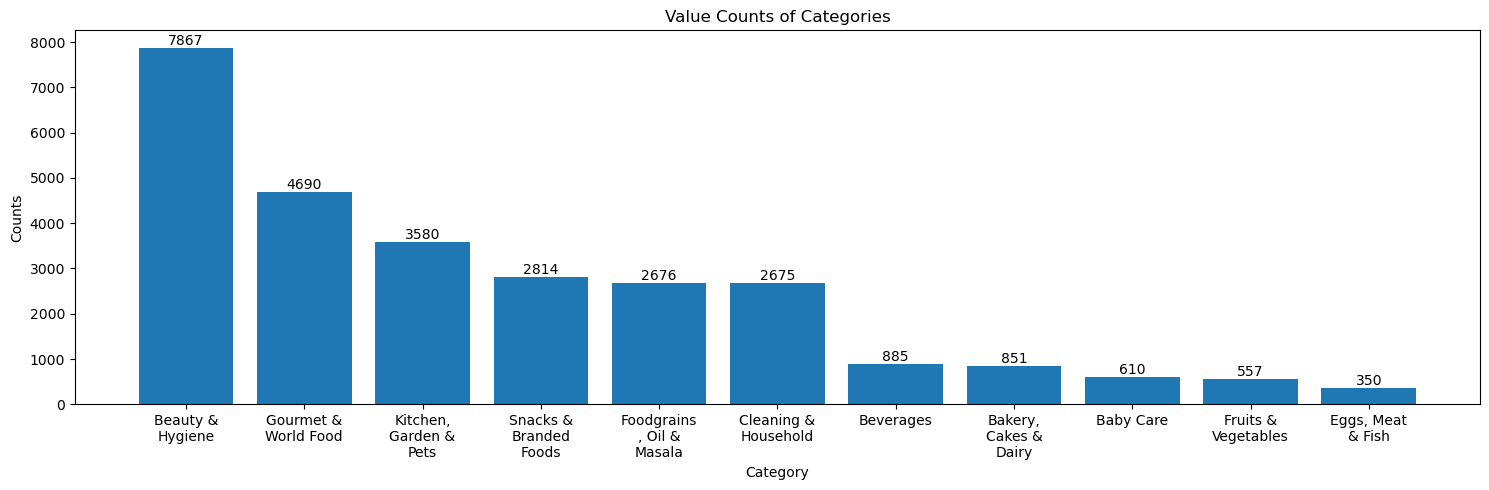

In [14]:
# Set the maximum width for wrapping the x-axis labels
max_width = 10

# Apply text wrapping to the x-axis labels
wrapped_labels = [textwrap.fill(label, width=max_width) for label in df_counts.index]

plt.figure(figsize=(15,5))

plt.bar(wrapped_labels, df_counts['Counts'])
plt.xlabel('Category')
plt.ylabel('Counts')
plt.title('Value Counts of Categories')
plt.tight_layout()  # Adjust the layout to prevent overlapping labels

# Adding value labels on top of each bar
for i, count in enumerate(df_counts['Counts']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [15]:
# px.bar(data_frame=counts_df,
#  x='Category',
#  y='Counts',
#  color='Counts',
#  color_continuous_scale='blues',
#  text_auto=True,
#  title=f'Count of Items in Each Category')


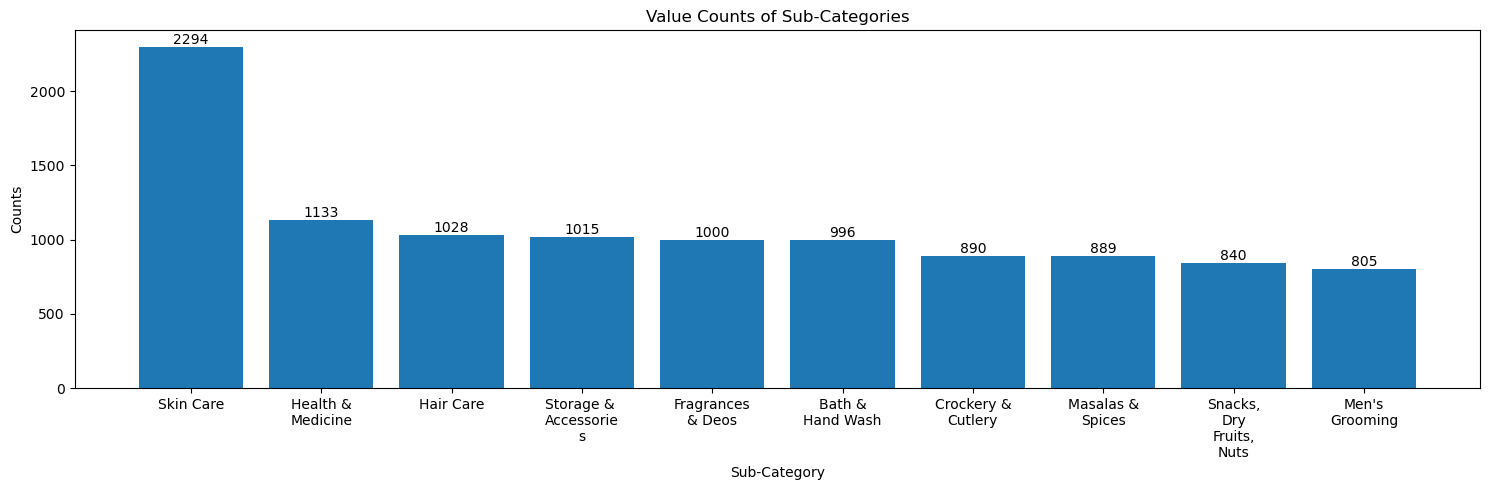

In [16]:
counts = df['sub_category'].value_counts()[:10]


df_counts_1 = pd.DataFrame(counts)
df_counts_1.columns = ['Counts']
df_counts_1.index.name = 'sub_category'


# Set the maximum width for wrapping the x-axis labels
max_width = 10

# Apply text wrapping to the x-axis labels
wrapped_labels = [textwrap.fill(label, width=max_width) for label in df_counts_1.index]

plt.figure(figsize=(15,5))

plt.bar(wrapped_labels, df_counts_1['Counts'])
plt.xlabel('Sub-Category')
plt.ylabel('Counts')
plt.title('Value Counts of Sub-Categories')
plt.tight_layout()  # Adjust the layout to prevent overlapping labels

# Adding value labels on top of each bar
for i, count in enumerate(df_counts_1['Counts']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [17]:
# px.bar(data_frame=counts_df_1,
#  x='Category',
#  y='Counts',
#  color='Counts',
#  color_continuous_scale='blues',
#  text_auto=True,
#  title=f'Top 10 Bought Sub_Categories')


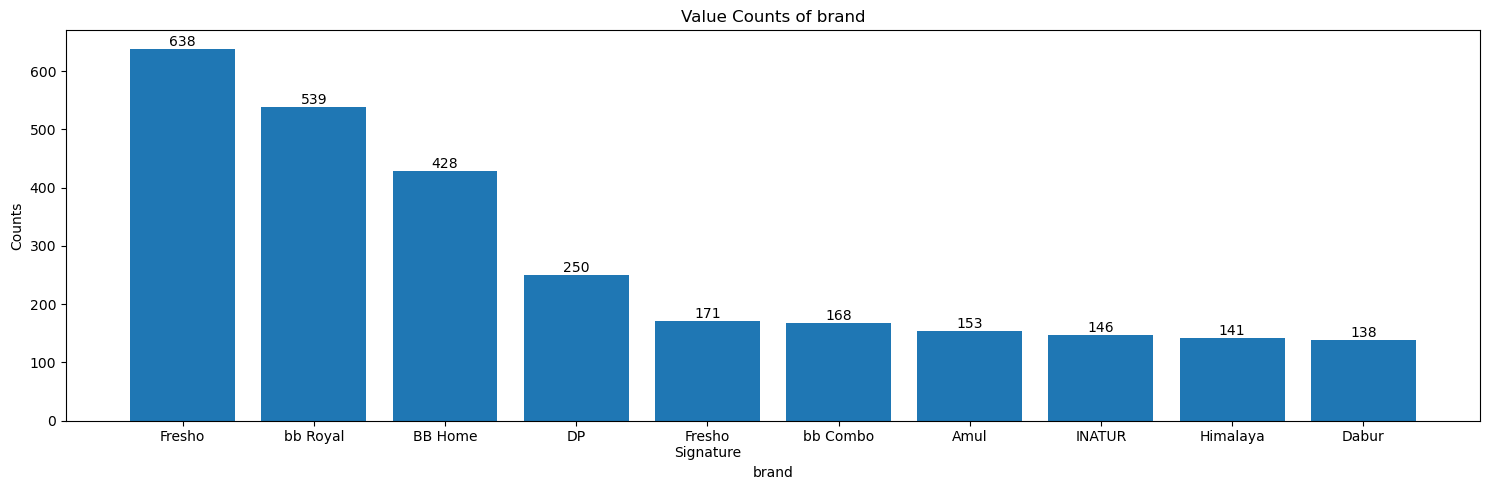

In [18]:
counts = df['brand'].value_counts()[:10]


df_counts_1 = pd.DataFrame(counts)
df_counts_1.columns = ['Counts']
df_counts_1.index.name = 'brand'


# Set the maximum width for wrapping the x-axis labels
max_width = 10

# Apply text wrapping to the x-axis labels
wrapped_labels = [textwrap.fill(label, width=max_width) for label in df_counts_1.index]

plt.figure(figsize=(15,5))

plt.bar(wrapped_labels, df_counts_1['Counts'])
plt.xlabel('brand')
plt.ylabel('Counts')
plt.title('Value Counts of brand')
plt.tight_layout()  # Adjust the layout to prevent overlapping labels

# Adding value labels on top of each bar
for i, count in enumerate(df_counts_1['Counts']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [19]:
# px.bar(data_frame=counts_df_brand,
#  x='Brand Name',
#  y='Counts',
#  color='Counts',
#  color_continuous_scale='blues',
#  text_auto=True,
#  title=f'Top 10 Brand Items based on Item Counts')

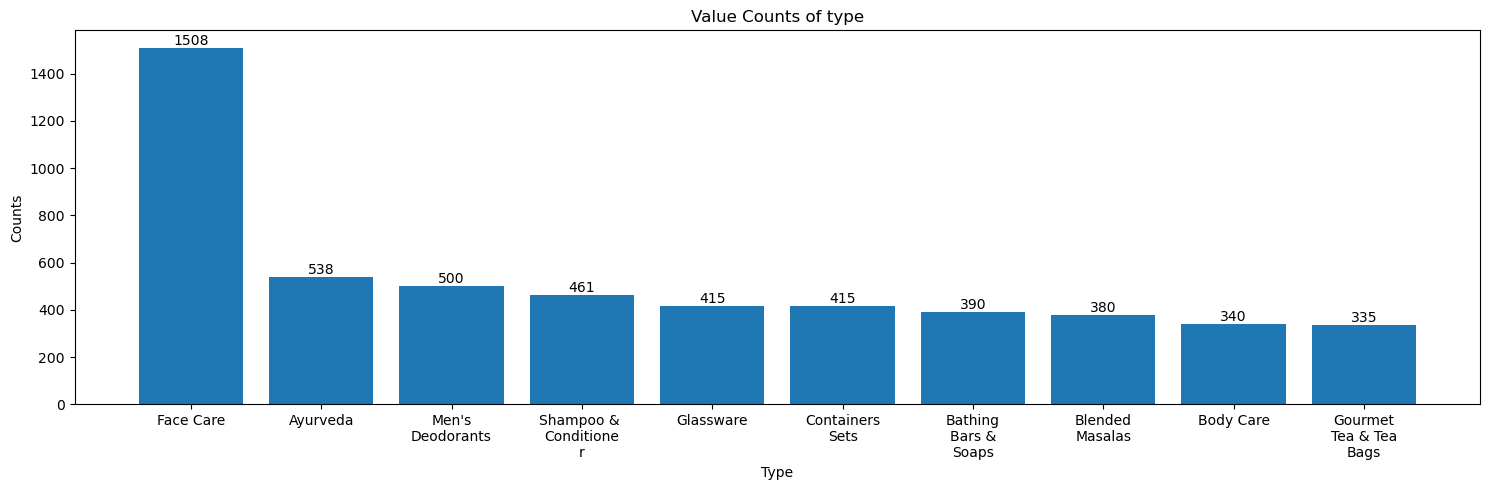

In [20]:
counts = df['type'].value_counts()[:10]


df_counts_2 = pd.DataFrame(counts)
df_counts_2.columns = ['Counts']
df_counts_2.index.name = 'type'


# Set the maximum width for wrapping the x-axis labels
max_width = 10

# Apply text wrapping to the x-axis labels
wrapped_labels = [textwrap.fill(label, width=max_width) for label in df_counts_2.index]

plt.figure(figsize=(15,5))

plt.bar(wrapped_labels, df_counts_2['Counts'])
plt.xlabel('Type')
plt.ylabel('Counts')
plt.title('Value Counts of type')
plt.tight_layout()  # Adjust the layout to prevent overlapping labels

# Adding value labels on top of each bar
for i, count in enumerate(df_counts_2['Counts']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

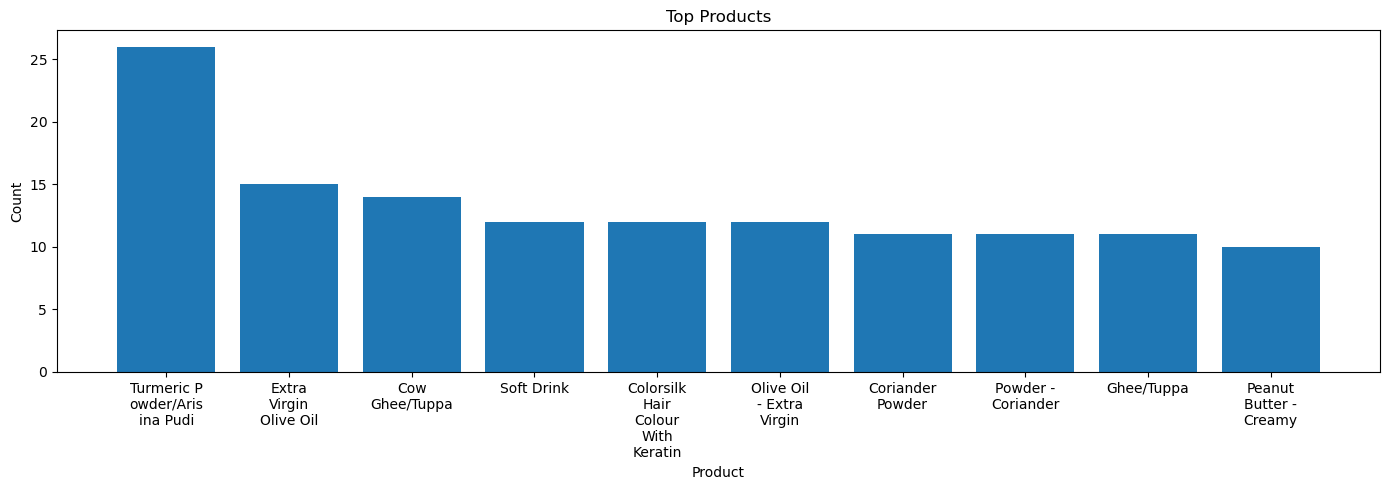

In [21]:
top_Product=df['product'].value_counts().head(10)
least_Product=df['product'].value_counts().tail(10)


# Calculate the top product counts
top_product = df['product'].value_counts().head(10)

# Set the maximum width for wrapping the x-axis labels
max_width = 10

# Apply text wrapping to the x-axis labels
wrapped_labels = [textwrap.fill(label, width=max_width) for label in top_product.index]

# Create a bar plot of the top products with wrapped x-axis labels
plt.figure(figsize=(14, 5))
plt.bar(wrapped_labels, top_product.values)
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Top Products')
#plt.xticks(ha='right')  # Rotate and align the x-axis labels
plt.tight_layout()  # Adjust the layout to prevent overlapping labels
plt.show()


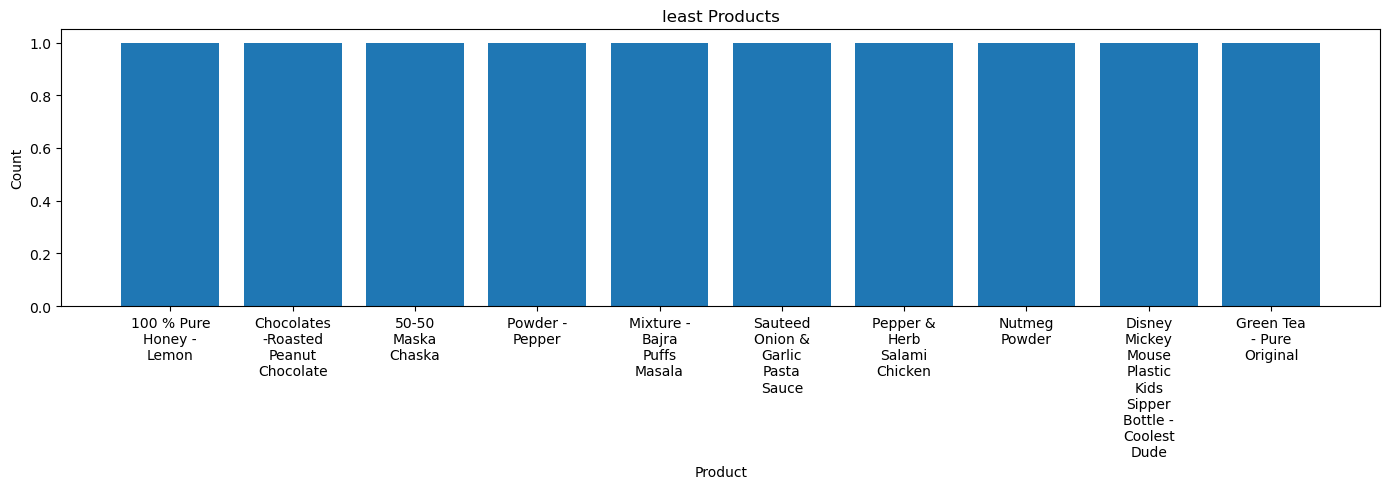

In [22]:
# Calculate the least product counts
top_product = df['product'].value_counts().tail(10)

# Set the maximum width for wrapping the x-axis labels
max_width = 10

# Apply text wrapping to the x-axis labels
wrapped_labels = [textwrap.fill(label, width=max_width) for label in top_product.index]

# Create a bar plot of the least products with wrapped x-axis labels
plt.figure(figsize=(14, 5))
plt.bar(wrapped_labels, top_product.values)
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('least Products')
#plt.xticks(rotation=90 ,ha='right')  # Rotate and align the x-axis labels
plt.tight_layout()  # Adjust the layout to prevent overlapping labels
plt.show()

In [23]:
top_Product=df['category'].value_counts().head(10)
least_Product=df['category'].value_counts().tail(10)

print(top_Product)
print(least_Product)

Beauty & Hygiene            7867
Gourmet & World Food        4690
Kitchen, Garden & Pets      3580
Snacks & Branded Foods      2814
Foodgrains, Oil & Masala    2676
Cleaning & Household        2675
Beverages                    885
Bakery, Cakes & Dairy        851
Baby Care                    610
Fruits & Vegetables          557
Name: category, dtype: int64
Gourmet & World Food        4690
Kitchen, Garden & Pets      3580
Snacks & Branded Foods      2814
Foodgrains, Oil & Masala    2676
Cleaning & Household        2675
Beverages                    885
Bakery, Cakes & Dairy        851
Baby Care                    610
Fruits & Vegetables          557
Eggs, Meat & Fish            350
Name: category, dtype: int64


<a id='section-5'></a>
<p style="background-color:#373435;color:#fff;font-family:newtimeroman;font-size:200%;text-align:center;border-radius:10px 10px; padding:10px;">Demographic Filter Recommendor</p>

<p style="text-align:center;">
<a href="#section-0" style="background-color:#373333;color:#f1f1f1;font-family:newtimeroman;text-align:center;border-radius:10px 10px; padding:10px;">Back To Top</a>
</p>

<p style="color:#373435; font-size:16px;font-weight:400;">Demographic Filtering is like recommeding items based on a feature. Like the top 10 rated items or the top 10 items in a particular category.</p>

In [24]:
def sort_recommendor(col='rating',sort_type = False):
    """
    A recommendor based on sorting products on the column passed.
    Arguments to be passed:
    
    col: The Feature to be used for recommendation.
    sort_type: True for Ascending Order
    """
    rated_recommend = df.copy()
    if rated_recommend[col].dtype == 'O':
        col='rating'
    rated_recommend = rated_recommend.sort_values(by=col,ascending = sort_type)
    return rated_recommend[['product','brand','sale_price','rating']].head(10)

In [25]:
help(sort_recommendor)

Help on function sort_recommendor in module __main__:

sort_recommendor(col='rating', sort_type=False)
    A recommendor based on sorting products on the column passed.
    Arguments to be passed:
    
    col: The Feature to be used for recommendation.
    sort_type: True for Ascending Order



In [26]:
sort_recommendor(col='sale_price',sort_type=True)

,product,brand,sale_price,rating
index,,,,
26977,Curry Leaves,Fresho,2.45,4.2
21313,Serum,Livon,3.00,2.5
14185,"Tomato - Local, Organically Grown",Fresho,5.00,4.2
2762,Orbit Sugar-Free Chewing Gum - Lemon & Lime,Wrigleys,5.00,4.2
17944,Fulltoss Tangy Tomato,Parle,5.00,4.2
19539,Layer Cake - Chocolate,Winkies,5.00,4.2
16552,Biscuits - Magix Kreams Choc,Parle,5.00,3.9
14539,Cadbury Perk - Chocolate Bar,Cadbury,5.00,4.2
22179,Tiger Elaichi Cream Biscuits,Britannia,5.00,4.2


<p style="color:#373435; font-size:16px;font-weight:400;">Notice that our top product has rating of 2.5 which is quite bad so let's filter down by setting a threshold rating.</p>

In [27]:
C= df['rating'].mean()
C

4.023734349482276

<p style="color:#373435; font-size:16px;font-weight:400;">So the average rating of products is 3.94
Let's use 3.5 as the threshold.</p>

In [28]:
def sort_recommendor(col='rating',sort_type = False):
    """
    A recommendor based on sorting products on the column passed.
    Arguments to be passed:
    
    col: The Feature to be used for recommendation.
    sort_type: True for Ascending Order
    """
    rated_recommend = df.copy().loc[df['rating'] >= 3.5]
    if rated_recommend[col].dtype == 'O':
        col='rating'
    rated_recommend = rated_recommend.sort_values(by=col,ascending = sort_type)
    return rated_recommend[['product','brand','sale_price','rating']].head(10)

In [29]:
sort_recommendor(col='sale_price',sort_type=True)

,product,brand,sale_price,rating
index,,,,
26977,Curry Leaves,Fresho,2.45,4.2
17641,Hand Wash - Moisture Shield,Savlon,5.00,4.4
2979,Sugar Free Chewing Gum - Mixed Fruit,Orbit,5.00,4.2
22179,Tiger Elaichi Cream Biscuits,Britannia,5.00,4.2
27414,Layer Cake - Orange,Winkies,5.00,4.1
11436,Exam Standard Scale,Camlin,5.00,4.2
24672,Fulltoss Thai Sriracha,Parle,5.00,4.1
17944,Fulltoss Tangy Tomato,Parle,5.00,4.2
9972,"Tomato - Local, Organically Grown",Fresho,5.00,4.2


<p style="color:#373435; font-size:16px;font-weight:400;">Notice that the 2.5 rated product is not recommended now!!
This was our first recommendor.
<br>
Quite easy yet effective and used a lot !!</p>

<a id='section-6'></a>
<p style="background-color:#373435;color:#fff;font-family:newtimeroman;font-size:200%;text-align:center;border-radius:10px 10px; padding:10px;">Content Based Recommendor</p>

<p style="text-align:center;">
<a href="#section-0" style="background-color:#373333;color:#f1f1f1;font-family:newtimeroman;text-align:center;border-radius:10px 10px; padding:10px;">Back To Top</a>
</p>

In [30]:
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


<p style="color:#373435; font-size:16px;font-weight:400;">Let's try using other features such as Category, Sub Category, Brand, Type and Description for much better Recommendation.<br>
We will be using NLP here to extract useful info from the features especially Description so let's understand TF-IDF before using it.</p>

<p style="color:#373435; font-size:16px;font-weight:400;">
    <b>TF-IDF</b> stands for <b>term frequency-inverse document frequency</b>.
</p>
<p style="color:#373435; font-size:18px;font-weight:500;">
    <b>What is TF(Term Frequency):</b>
</p>
<p style="color:#373435; font-size:16px;font-weight:400;">
Term frequency works by looking at the frequency of a particular term you are concerned with relative to the document. There are multiple measures, or ways, of defining frequency: Number of times the word appears in a document (raw count).
<br><br>
Term frequency adjusted for the length of the document (raw count of occurences divided by number of words in the document).
Logarithmically scaled frequency (e.g. log(1 + raw count)).
Boolean frequency (e.g. 1 if the term occurs, or 0 if the term does not occur, in the document).
</p>

<p style="color:#373435; font-size:18px;font-weight:500;">
    <b>What is IDF (inverse document frequency)?</b>
<p>
<p style="color:#373435; font-size:16px;font-weight:400;">
Inverse document frequency looks at how common (or uncommon) a word is amongst the corpus. IDF is calculated as follows where t is the term (word) we are looking to measure the commonness of and N is the number of documents (d) in the corpus (D).. 
<br>
The denominator is simply the number of documents in which the term, t, appears in. 
    
<div style="text-align:center;">
<img src="https://ecm.capitalone.com/WCM/tech/tf-idf-1.png">
</div>
    
<br>
<div style="text-align:center;">
    <p style="color:#373435; font-size:20px;font-weight:600;text-align:center">
    <b>TF-IDF at work</b>
    </p>
<img src="https://ecm.capitalone.com/WCM/tech/tf-idf-4.png"/>
</div>
<div style="text-align:center;">
    <a href="https://www.capitalone.com/tech/machine-learning/understanding-tf-idf/" target="_blank" style="color:blue; font-size:20px;font-weight:600;text-align:center">Source Credits</a>
</div>
    

In [31]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['description'])
tfidf_matrix.shape

(27555, 28666)

<p style="color:#373435; font-size:16px;font-weight:400;">
Now to compute the similarity score, let's use Linear_Kernel.
    <br>
    Linear Kernel which Calculates the Dot Product of the tfidf_matrix and returns an aggreate value depicting the Similarity score.
</p>

In [32]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.01579276, 0.00998345, ..., 0.01078472, 0.01119732,
        0.        ],
       [0.01579276, 1.        , 0.00698283, ..., 0.        , 0.        ,
        0.        ],
       [0.00998345, 0.00698283, 1.        , ..., 0.00628232, 0.        ,
        0.        ],
       ...,
       [0.01078472, 0.        , 0.00628232, ..., 1.        , 0.        ,
        0.        ],
       [0.01119732, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

<p style="color:#373435; font-size:16px;font-weight:400;">
So we will be recommending items based on similarity score.<br>
But our problem is that we will be getting back the similarity scores so we will be sorting the scores.<br>
Now we need a reverse-map to get the title and that is what <b>indices</b> is for.
</p>

In [33]:
indices = pd.Series(df.index, index=df['product']).drop_duplicates()

def get_recommendations_1(title, cosine_sim=cosine_sim):
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df['product'].iloc[movie_indices]

In [34]:
get_recommendations_1('Water Bottle - Orange')

index
1677         Brass Nanda Stand Goblets - No.1
2162         Brass Kachua Stand Deepam - No.1
2756     Brass Angle Deep Stand - Plain, No.2
5400       Brass Lakshmi Deepam - Plain, No.2
6520                Brass Kuber Deepam - No.1
10504               Brass Kuber Deepam - No.2
11226    Brass Angle Deep Stand - Plain, No.3
11504    Brass Angle Deep Stand - Plain, No.1
12699        Brass Kachua Stand Deepam - No.2
18572               Brass Kuber Deepam - No.3
Name: product, dtype: object

In [35]:
get_recommendations_1('Cadbury Perk - Chocolate Bar')

index
14540                Face Wash For Men - Oil Clear
1441     Styling Shampoo For Men - Cooling & Style
15406    Styling Shampoo For Men - Cooling & Style
6859                  Perfume Spray For Men - Edge
4849         Styling Wax For Men - Clean Cut Shine
11193                    Wet Look Styling Hair Gel
24448                    Wet Look Styling Hair Gel
7825                             Wet Look Hair Gel
12608                  Charcoal Face Scrub For Men
11712                     2-in-1 Serum, Soft & Set
Name: product, dtype: object

<p style="color:#373435; font-size:16px;font-weight:400;">
Our search was chocolate yet we got Cashews and Nuts recommended. <br>
We need to optimize this based on category, sub_category and brand.
</p>

In [36]:
df2 = df.copy()

In [37]:
df2.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [38]:
df2.shape

(27555, 9)

<p style="color:#373435; font-size:16px;font-weight:400;">
Notice that a product can be in multiple catergories and sub_categories and they are separated with a &.<br>
Let's split them into a list for futher processes.
</p>

In [39]:
rmv_spc = lambda a:a.strip()
get_list = lambda a:list(map(rmv_spc,re.split('& |, |\*|\n', a)))

In [40]:
get_list('A & B, C')

['A', 'B', 'C']

In [41]:
for col in ['category', 'sub_category', 'type']:
    df2[col] = df2[col].apply(get_list)

In [42]:
df2.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,"[Beauty, Hygiene]",[Hair Care],Sri Sri Ayurveda,220.0,220.0,"[Hair Oil, Serum]",4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"[Kitchen, Garden, Pets]","[Storage, Accessories]",Mastercook,180.0,180.0,"[Water, Fridge Bottles]",2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2","[Cleaning, Household]",[Pooja Needs],Trm,119.0,250.0,"[Lamp, Lamp Oil]",3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,"[Cleaning, Household]","[Bins, Bathroom Ware]",Nakoda,149.0,176.0,"[Laundry, Storage Baskets]",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,"[Beauty, Hygiene]","[Bath, Hand Wash]",Nivea,162.0,162.0,"[Bathing Bars, Soaps]",4.4,Nivea Creme Soft Soap gives your skin the best...


<p style="color:#373435; font-size:16px;font-weight:400;">
To avoid duplicacy, we will be converting everything to lowercase and also removing spaces between words. <br>
    This will ensure that our recommendor doesn't consider <b>Chocolate</b> of <b>Cholocate IceCream</b> and <b>Chocolate Bar</b> as the same.
</p>

In [43]:
def cleaner(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [44]:
for col in ['category', 'sub_category', 'type','brand']:
    df2[col] = df2[col].apply(cleaner)

In [45]:
df2.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,"[beauty, hygiene]",[haircare],srisriayurveda,220.0,220.0,"[hairoil, serum]",4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"[kitchen, garden, pets]","[storage, accessories]",mastercook,180.0,180.0,"[water, fridgebottles]",2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2","[cleaning, household]",[poojaneeds],trm,119.0,250.0,"[lamp, lampoil]",3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,"[cleaning, household]","[bins, bathroomware]",nakoda,149.0,176.0,"[laundry, storagebaskets]",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,"[beauty, hygiene]","[bath, handwash]",nivea,162.0,162.0,"[bathingbars, soaps]",4.4,Nivea Creme Soft Soap gives your skin the best...


<p style="color:#373435; font-size:16px;font-weight:400;">
We will now be joining the values of category, sub_category, type and brand
</p>

In [46]:
def couple(x):
    return ' '.join(x['category']) + ' ' + ' '.join(x['sub_category']) + ' '+x['brand']+' ' +' '.join( x['type'])
df2['soup'] = df2.apply(couple, axis=1)

In [47]:
df2['soup'].head()

index
1    beauty hygiene haircare srisriayurveda hairoil...
2    kitchen garden pets storage accessories master...
3       cleaning household poojaneeds trm lamp lampoil
4    cleaning household bins bathroomware nakoda la...
5    beauty hygiene bath handwash nivea bathingbars...
Name: soup, dtype: object

<p style="color:#373435; font-size:16px;font-weight:400;">
We need to Count the String Vectors and then compute the Cosine Similarity Score.
</p>

In [48]:
df2.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description,soup
index,,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,"[beauty, hygiene]",[haircare],srisriayurveda,220.0,220.0,"[hairoil, serum]",4.1,This Product contains Garlic Oil that is known...,beauty hygiene haircare srisriayurveda hairoil...
2,Water Bottle - Orange,"[kitchen, garden, pets]","[storage, accessories]",mastercook,180.0,180.0,"[water, fridgebottles]",2.3,"Each product is microwave safe (without lid), ...",kitchen garden pets storage accessories master...
3,"Brass Angle Deep - Plain, No.2","[cleaning, household]",[poojaneeds],trm,119.0,250.0,"[lamp, lampoil]",3.4,"A perfect gift for all occasions, be it your m...",cleaning household poojaneeds trm lamp lampoil
4,Cereal Flip Lid Container/Storage Jar - Assort...,"[cleaning, household]","[bins, bathroomware]",nakoda,149.0,176.0,"[laundry, storagebaskets]",3.7,Multipurpose container with an attractive desi...,cleaning household bins bathroomware nakoda la...
5,Creme Soft Soap - For Hands & Body,"[beauty, hygiene]","[bath, handwash]",nivea,162.0,162.0,"[bathingbars, soaps]",4.4,Nivea Creme Soft Soap gives your skin the best...,beauty hygiene bath handwash nivea bathingbars...


In [49]:
df2.to_csv('data_cleaned_1.csv')

In [50]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

<p style="color:#373435; font-size:16px;font-weight:400;">
We need to Count the String Vectors and then compute the Cosine Similarity Score.
</p>

In [51]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
cosine_sim2

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.27216553],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.27216553, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html#sklearn.metrics.pairwise.cosine_similarity" target="_blank" style="color:blue; font-size:16px;font-weight:400;">
Cosine Similarity Documentation
</a>

In [52]:
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['product'])

In [53]:

def get_recommendations_2(title, cosine_sim=cosine_sim):
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    return df2['product'].iloc[movie_indices]

<p style="color:#373435; font-size:16px;font-weight:400;">
Comparing Old and New Recommedations
</p>

In [54]:
old_rec = get_recommendations_1('Water Bottle - Orange').values
new_rec = get_recommendations_2('Water Bottle - Orange', cosine_sim2).values

pd.DataFrame({'Old Recommendor': old_rec,'New Recommendor':new_rec})

,Old Recommendor,New Recommendor
0,"Rectangular Plastic Container - With Lid, Mult...","Penta Plastic Pet Water Bottle - Green, Wide M..."
1,"Jar - With Lid, Yellow",Glass Water Bottle - Aquaria Organic Purple
2,"Rectangular Container - With lid, Multicolour","Octa Plastic Pet Water Bottle - Light Blue, Na..."
3,"Round & Flat Storage Container - With lid, Green",Glass Matt Finish Bottle With Plastic Cap - Bl...
4,"Round Plastic Container - With Lid, Pink",Suzzan Glass Bottle With Blue Cap
5,Premium Rectangular Plastic Container With Lid...,"Stainless Steel Water Bottle - Blue, BB506 3"
6,Premium Round Plastic Container With Lid - Yellow,Ivory Glass Bottle - Orange & Yellow Floral
7,Premium Rectangular Plastic Container With Lid...,Glass Bottle With Removable Fabric Cover - Gre...
8,Premium Round & Flat Storage Container With Li...,Stainless Steel Water Bottle - Red BB 508
9,Premium Round Plastic Container With Lid - Blue,"Glass Water Bottle With Round Base - Yellow, B..."


In [55]:
old_rec = get_recommendations_1('Cadbury Perk - Chocolate Bar').values
new_rec = get_recommendations_2('Cadbury Perk - Chocolate Bar', cosine_sim2).values

pd.DataFrame({'Old Recommendor': old_rec,'New Recommendor':new_rec})

,Old Recommendor,New Recommendor
0,Cadbury Perk - Chocolate Bar,Nutties Chocolate Pack
1,Choco Stick - Hexagon Pack,5 Star Chocolate Bar
2,Luvit Chocwich White Home Delights 187 g,Dairy Milk Silk - Hazelnut Chocolate Bar
3,Cookies & Cream,"Perk - Chocolate, Home Treats, 175.5 g, 27 Units"
4,Luvit Chocwich Home Delights 187 g,Dark Milk Chocolate Bar
5,Wafer Biscuits - Chocolate Flavor,Dairy Milk Silk Mousse - Chocolate Bar
6,Drinking Chocolate - Original,Dark Milk Chocolate Bar
7,Drinking Chocolate - Original,Chocolate Bar - Fuse
8,Wafers With Vanilla Cream,Choclairs Gold Coffee
9,Wafers With Hazelnut Cream,"5 Star Chocolate Home Pack, 200 g, 20 units"


<p style="color:#373435; font-size:16px;font-weight:400;">
Our new recommendation are much better compared to the old ones.
</p>